# BASIC OPERATIONS WITH ANGLES

For 2 years I am envolved in the development of a prototype for a self-driving work machine. This is more a sanbox for collegues and me than a *state-of-the-art* ai project. After 2d $ ( x, y ) $ coordinate the angles related to direction and orientation were basically one of the most important values in our algorithms. In the beginning I just copy pasted all formulars from wikipedia and stackoverflow. But then the alogorithms starts to become more complex. I want to share my exploration in this topic with me. This is not an tutorial so I dont use a bottom-up approach, just showing the parts I have to learn.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from math import pi, atan2, sin, cos
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

### How to represent an angle?

The standard unit for angular measure is radian. 

> The radian is the SI unit for measuring angles, and is the standard unit of angular measure used in many areas of mathematics.

A full circle angle is one radian $ 1 \text{ rad} = 2 \pi $ .

![radian](img/radian.png)

From there we're able to do conversion in many different units:

- Turn
- Degree
- Hour
- Minute
- Second
- [Milliradian](https://en.wikipedia.org/wiki/Milliradian)

> Milliradians are used in adjustment of firearm sights by adjusting the angle of the sight compared to the barrel (up, down, left or right). A milliradian (SI-symbol mrad, sometimes also abbreviated mil) is an SI derived unit for angular measurement which is defined as a thousandth of a radian (0.001 radian)

- 6400 NATO mils

> For instance there are artillery sights and compasses with 6400 NATO mils, ... per turn instead of 360° or 2π radians, achieving higher resolution than a 360° compass while also being easier to divide into parts than if true milliradians were used.

In [2]:
df = pd.DataFrame({"Turns": [i/8 for i in range(0, 9)]})
df["Radians"] = 2*pi*df["Turns"]
df["Degrees"] = (180/pi*df["Radians"]).astype(int)
df["Hours"] = (12/pi*df["Radians"]).astype(int)
df["Minutes"] = (12*60/pi*df["Radians"]).astype(int)
df["Seconds"] = (12*60*60/pi*df["Radians"]).astype(int)
df["Milliradians"] = (df["Radians"]*1000).astype(int)
df["6400 NATO mils"] = (3200/pi*df["Radians"]).astype(int)
df = df.apply(lambda v: round(v, 4))
df

,Turns,Radians,Degrees,Hours,Minutes,Seconds,Milliradians,6400 NATO mils
0,0.000,0.0000,0,0,0,0,0,0
1,0.125,0.7854,45,3,180,10800,785,800
2,0.250,1.5708,90,6,360,21600,1570,1600
3,0.375,2.3562,135,9,540,32400,2356,2400
4,0.500,3.1416,180,12,720,43200,3141,3200
5,0.625,3.9270,225,15,900,54000,3926,4000
6,0.750,4.7124,270,18,1080,64800,4712,4800
7,0.875,5.4978,315,21,1260,75600,5497,5600
8,1.000,6.2832,360,24,1440,86400,6283,6400


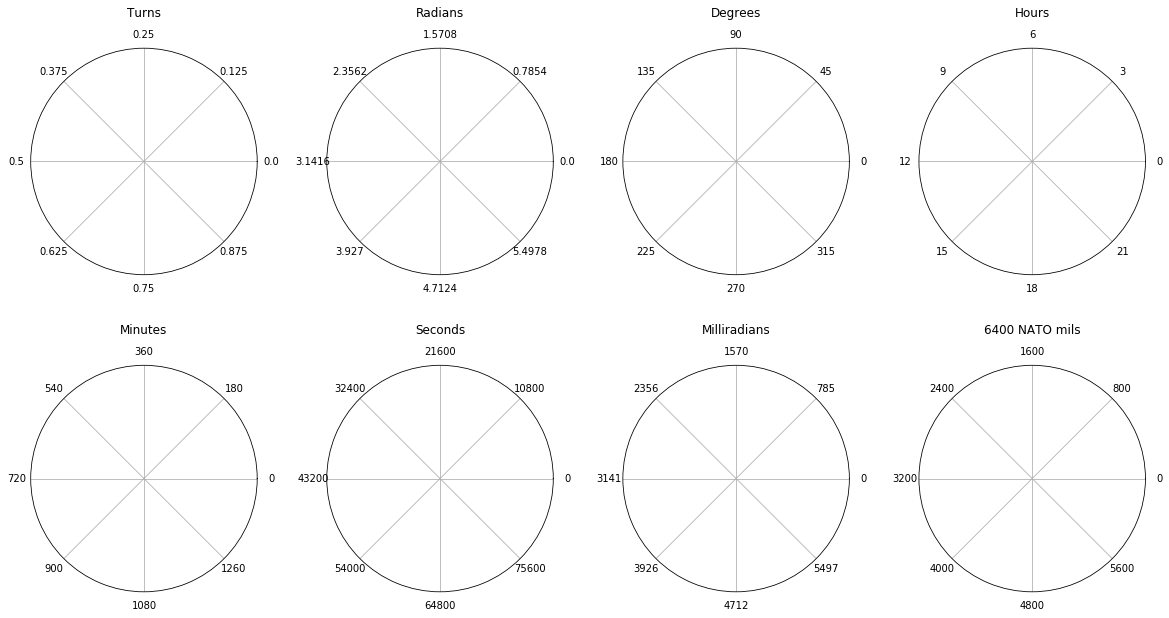

In [3]:
fig, axes = plt.subplots(2, 4, subplot_kw=dict(projection='polar'), figsize=(20, 10))
plt.subplots_adjust(wspace=.3, hspace=.4)

for i, col in enumerate(df.columns):
    ax = axes.flatten()[i]
    ax.set_title(col, pad=20)
    ax.set_xticklabels(df[col])
    ax.set_rticks([])

### Basic operations

Theres a lot of related math to working with angles. But I didn't need it all when I was exploring this topic. We are focusing on three main questions and try to solve them.

**How to compute smallest difference between to angles?**

For example we have a machine which is looking in one direction and we have a new target direction. We need to compute the difference between this two angles to know how much we need to rotate. This formular is short, easy to implements but not in my interest to dive in its fundamentals:

$$
\begin{eqnarray}
x = \cos (\alpha) \\
y = \sin (\alpha) \\
\left| \text{atan2} (y, x) \right|
\end{eqnarray}
$$

In [4]:
def diff(a1, a2):
    return abs(atan2(sin(a2-a1), cos(a2-a1)))


diff(.5, 5.783185307179586), diff(.5, 1.5)

(1.0000000000000002, 1.0)

**How to add and subtract radian to an given angle?**

A real world appliction would be to change the direction of a machine by rotation to a target angle. I've implemented two functions in python that takes an angle and an amount in radian. The two functions are doing this clockwise and counter-clockwise:

In [5]:
def cw(angle, amount):
    return (angle-amount+pi)%(2*pi)+pi


def ccw(angle, amount):
    return (angle+amount+pi)%(2*pi)-pi


cw(.5, 1), ccw(.5, 1)

(5.783185307179586, 1.5)

In [6]:
a1 = .2

In [7]:
%%capture
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(projection='polar'), figsize=(10, 5))
plt.subplots_adjust(wspace=.3)

for ax in (ax1, ax2):
    ax.grid(False)
    ax.set_rticks([])
    ax.set_rmax(.5)
    ax.set_xticks([1, 2, pi, 4, 5, 2*pi])
    ax.set_xticklabels([1, 2, "$\pi$", 4, 5, "$2 \pi$"])

line1, = ax1.plot([], [])
line2, = ax1.plot([], [], ":")
line3, = ax2.plot([], [])
line4, = ax2.plot([], [], ":")


def animate(i):
    return animate_cw(i)+animate_ccw(i)


def animate_cw(i):   
    i = i/100
    angle = cw(a1, i)  
    ax1.set_title(f"cw {round(i, 2)} rad")
    line1.set_data([0, angle], [0, 1])
    line2.set_data([0, a1], [0, 1])
    return line1, line2


def animate_ccw(i):
    i = i/100
    angle = ccw(a1, i)
    ax2.set_title(f"ccw {round(i, 2)} rad")
    line3.set_data([0, angle], [0, 1])
    line4.set_data([0, a1], [0, 1])
    return line3, line4 


anim = FuncAnimation(fig, animate, frames=int(2*pi)*10, interval=50, blit=True)

In [8]:
HTML(anim.to_html5_video())

### Conclusion

Theres a lot missing here and I just capture the basics but to be honest this was not easy for me. There are alway these things in life we want to learn and you just dont get it. Maybe I will continue exploring later but for now its enough.